<a href="https://colab.research.google.com/github/Yash-Bandal/Advance-Python-/blob/main/Assign11final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


## 1 Data Loading and PreProcessing

### 1. Import data

In [3]:
titanic=pd.read_csv('/content/drive/MyDrive/ML/Titanic.csv')
titanic.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2.Cleaning Data

In [5]:
# Handle missing values
# Fill 'Age' with median value
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Fill 'Embarked' with the most frequent value
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column (too many missing values)
titanic.drop(columns=['Cabin'], inplace=True)

# Drop any remaining rows with missing values (if any)
titanic.dropna(inplace=True)

# View cleaned dataset
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<ipython-input-5-6472b627a944>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
<ipython-input-5-6472b627a944>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

## 2.Feature Selection

In [6]:
# Select relevant features for modeling
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked', 'Survived']

# Create a new dataset with the selected features
titanic = titanic[features]

# Convert 'Sex' to numerical (male: 1, female: 0)
titanic['Sex'] = titanic['Sex'].map({'male': 1, 'female': 0})

# Convert 'Embarked' to numerical values
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# View the updated dataset after feature selection
titanic.head()



<ipython-input-6-d378404c06ab>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Sex'] = titanic['Sex'].map({'male': 1, 'female': 0})
<ipython-input-6-d378404c06ab>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


,Pclass,Sex,Age,Fare,SibSp,Parch,Embarked,Survived
0,3,1,22.0,7.2500,1,0,0,0
1,1,0,38.0,71.2833,1,0,1,1
2,3,0,26.0,7.9250,0,0,0,1
3,1,0,35.0,53.1000,1,0,0,1
4,3,1,35.0,8.0500,0,0,0,0


##3. Classifying and Visualizing Titanic Dataset Features

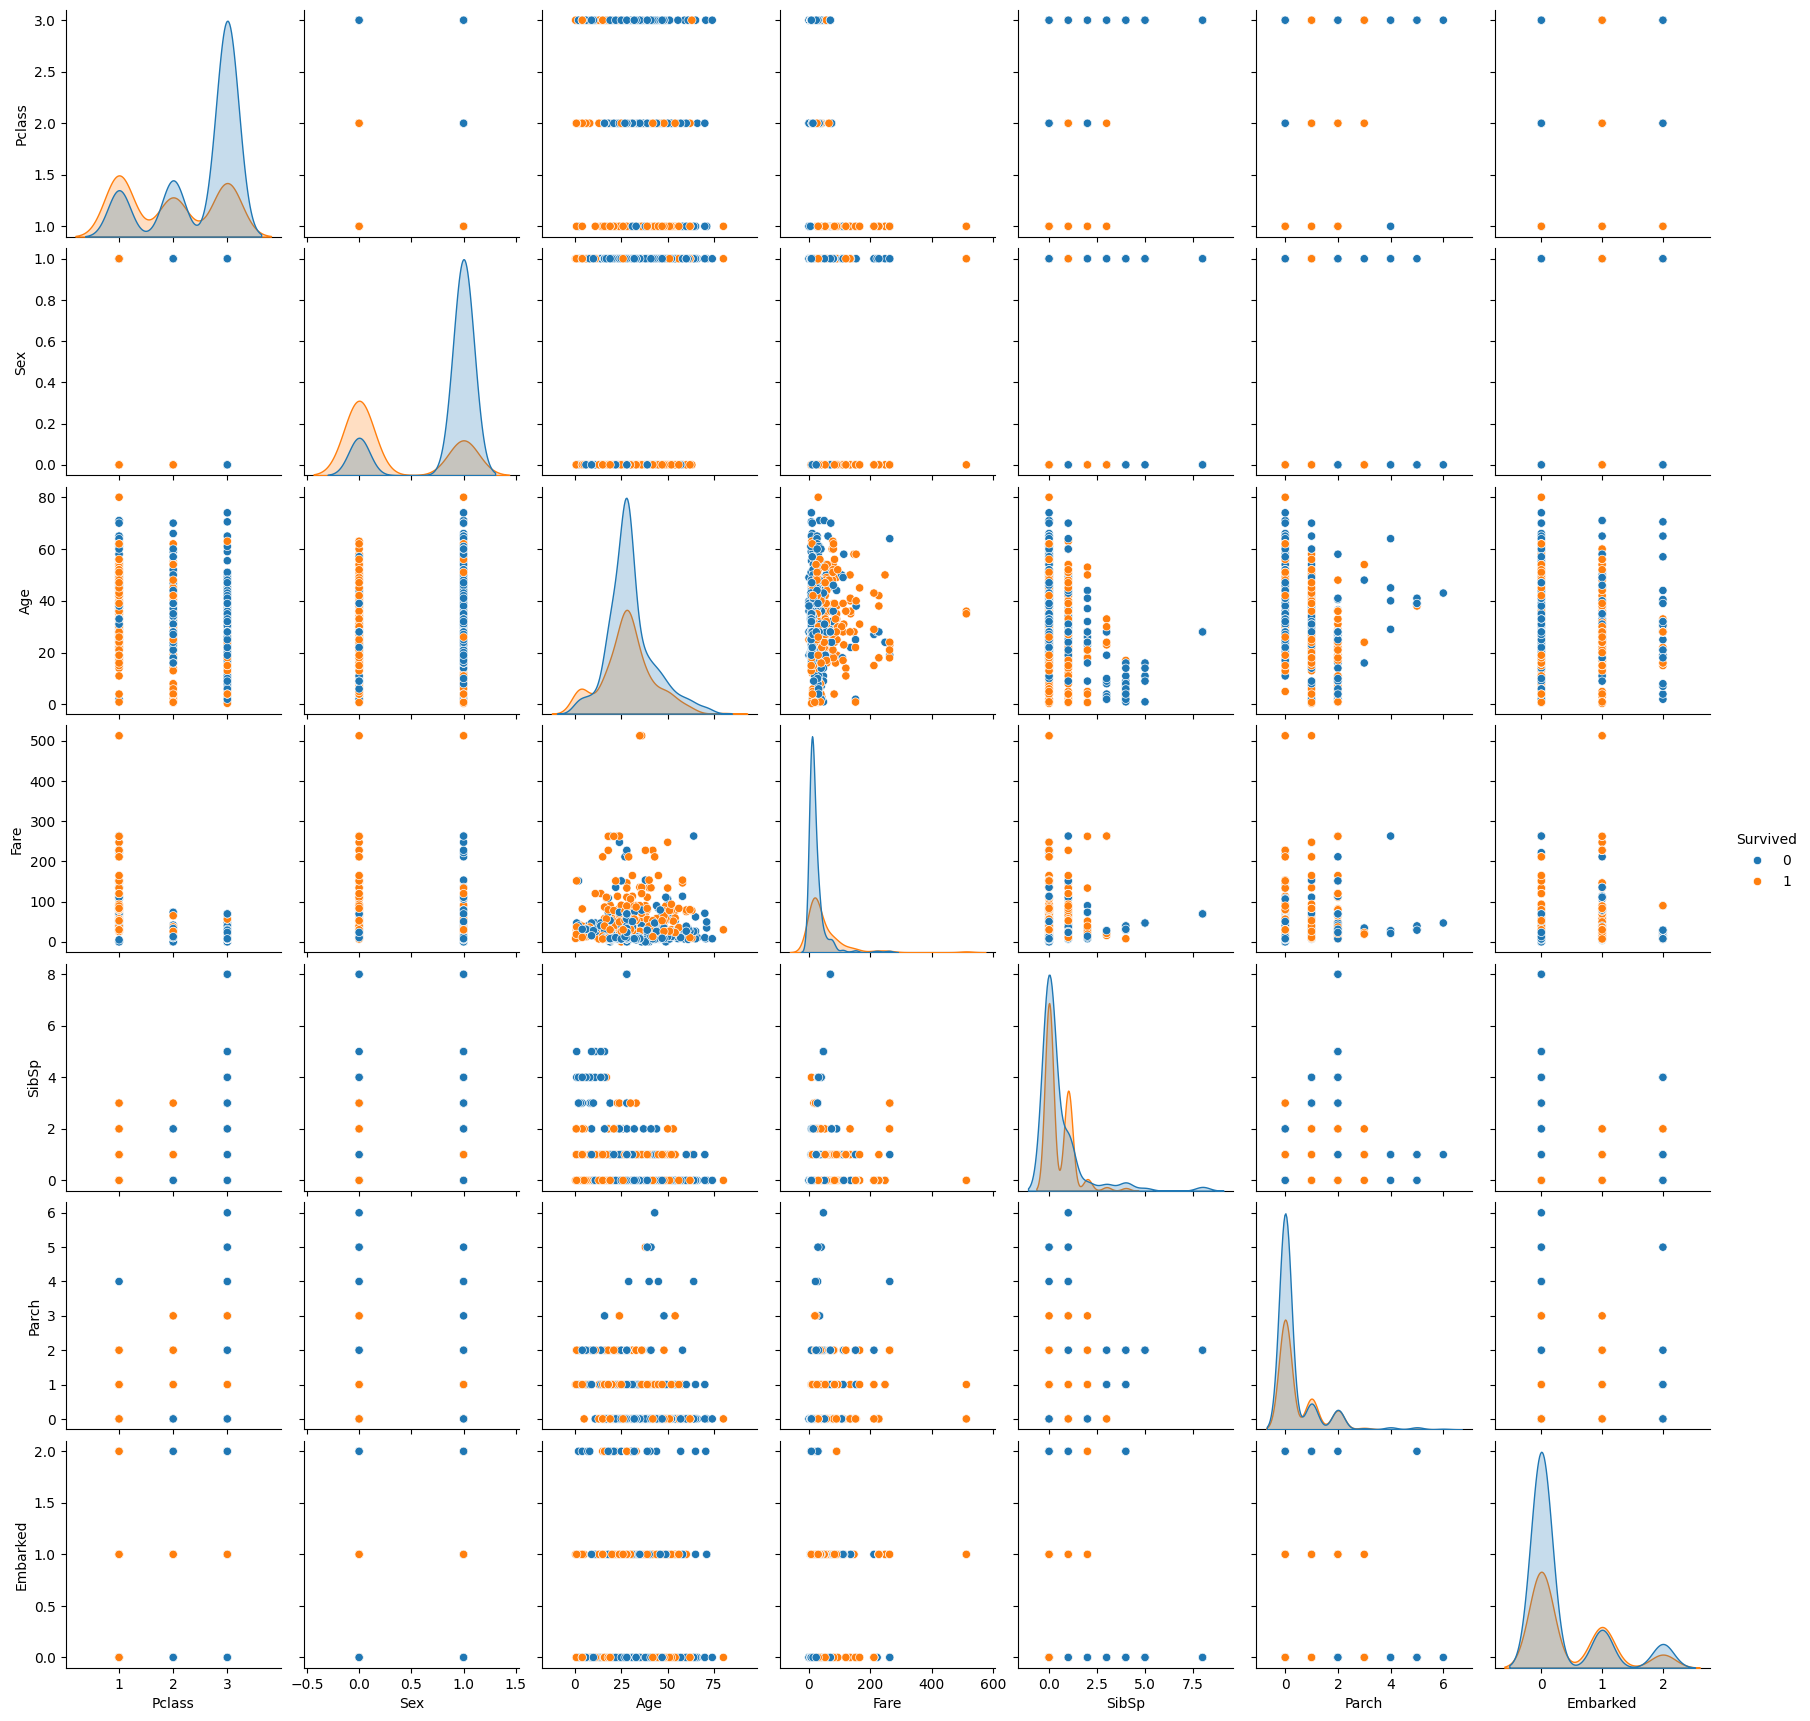

<ipython-input-7-4ef5edacd4ed>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='Pclass', palette='Set2', ax=axes[0, 2])


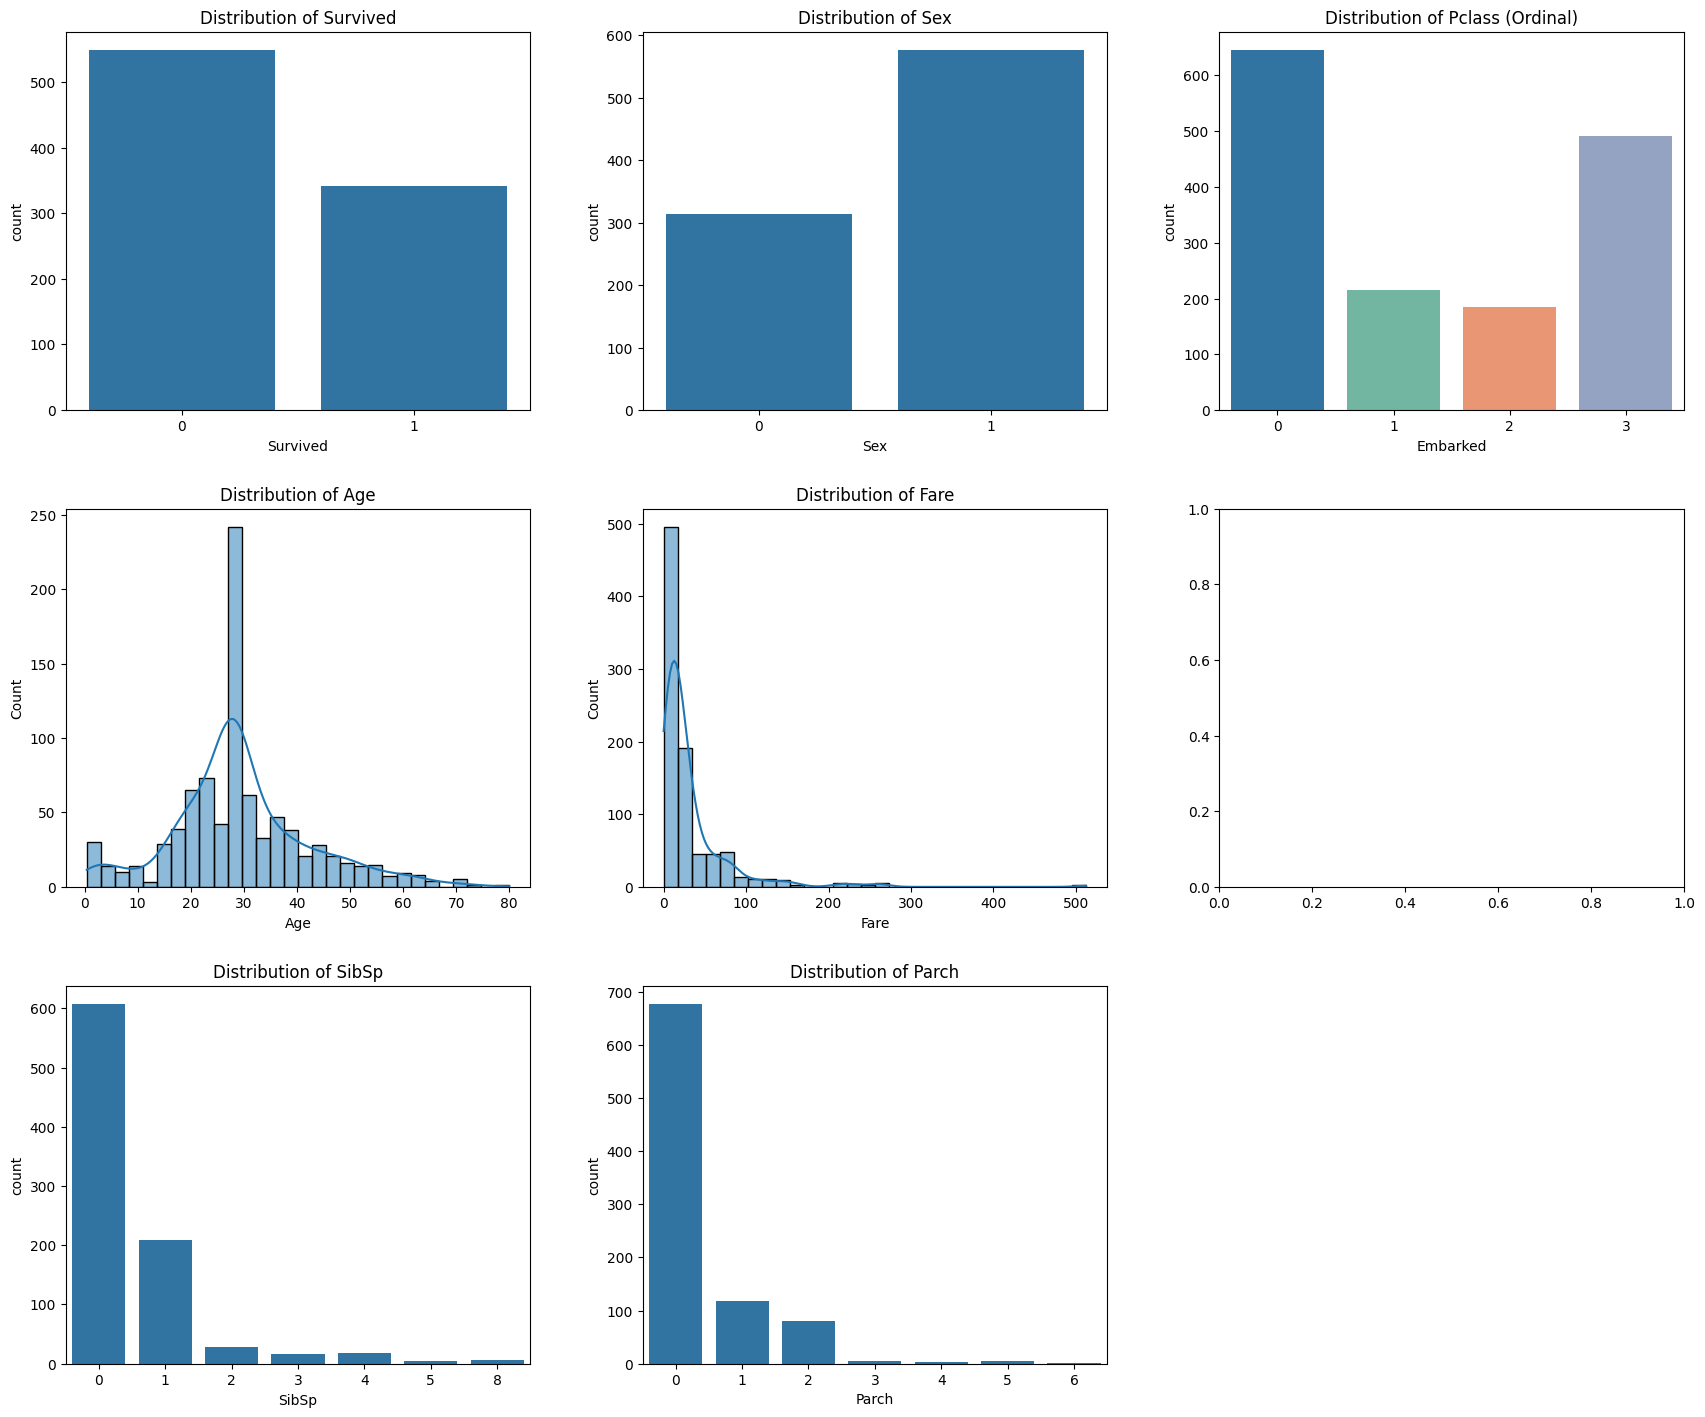

In [7]:
# Categorical Features
categorical_features = ['Survived', 'Sex', 'Embarked']

# Ordinal Feature
ordinal_feature = ['Pclass']

# Continuous Features
continuous_features = ['Age', 'Fare']

# Discrete Features
discrete_features = ['SibSp', 'Parch']

sns.pairplot(titanic, hue='Survived')
plt.show()


# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # 3x3 grid for 9 plots
fig.tight_layout(pad=5.0)
# Plot Categorical Features
for i, feature in enumerate(categorical_features):
    sns.countplot(data=titanic, x=feature, ax=axes[0, i])
    axes[0, i].set_title(f'Distribution of {feature}')

# Plot Ordinal Feature (Pclass)
sns.countplot(data=titanic, x='Pclass', palette='Set2', ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Pclass (Ordinal)')

# Plot Continuous Features
for i, feature in enumerate(continuous_features):
    sns.histplot(titanic[feature].dropna(), kde=True, bins=30, ax=axes[1, i])
    axes[1, i].set_title(f'Distribution of {feature}')

# Plot Discrete Features
for i, feature in enumerate(discrete_features):
    sns.countplot(data=titanic, x=feature, ax=axes[2, i])
    axes[2, i].set_title(f'Distribution of {feature}')

# Remove empty plot (since we have 8 features)
fig.delaxes(axes[2, 2])

# Show the plot
plt.show()

##4. PCA

In [10]:
# Separate features (X) and target variable (y)
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Standardize the features
x = StandardScaler().fit_transform(X)

# Apply PCA with the desired number of components (e.g., 2)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

# Add the target variable to the principal component DataFrame
# finalDf = pd.concat([principalDf, titanic[['Survived']]], axis = 1)
principalDf['Survived']=y

principalDf.head()


,principal component 1,principal component 2,Survived
0,-0.975260,-0.861867,0
1,1.569368,1.325520,1
2,-0.477318,-0.480838,1
3,1.352317,1.026072,1
4,-1.307314,0.091181,0


Explained Variance Ratio: [0.25659595 0.24061237]


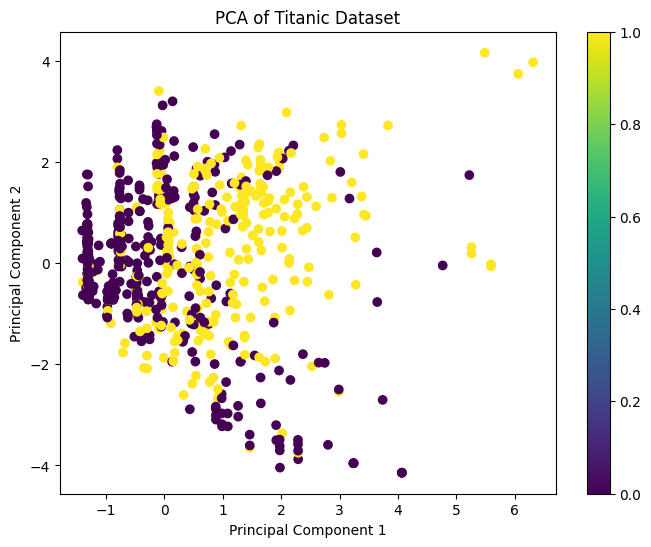

In [11]:
# Print the explained variance ratio for each principal component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf['Survived'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Titanic Dataset')
plt.colorbar()
plt.show()

In [12]:
principalDf.head() #after merging survived column feature

,principal component 1,principal component 2,Survived
0,-0.975260,-0.861867,0
1,1.569368,1.325520,1
2,-0.477318,-0.480838,1
3,1.352317,1.026072,1
4,-1.307314,0.091181,0


## 5. Modelling

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       105
           1       0.68      0.46      0.55        74

    accuracy                           0.69       179
   macro avg       0.68      0.65      0.65       179
weighted avg       0.69      0.69      0.67       179



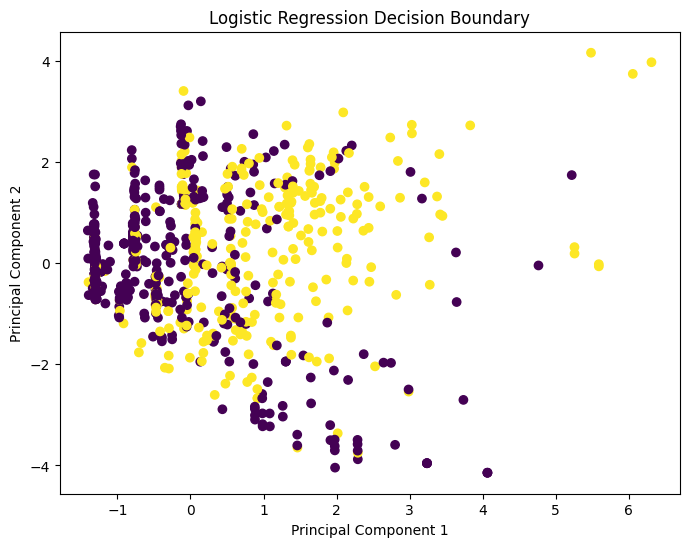

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principalDf[['principal component 1', 'principal component 2']], principalDf['Survived'], test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# You can also visualize the decision boundary if you have a 2D feature space
# (This part is optional)
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf['Survived'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression Decision Boundary')
 # Plot the decision boundary (requires some more code for the specific boundary)
 # ...
plt.show()

In [12]:
# ## Compare Reduced Dimension Data with Original Data

# Original Data (before PCA)
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train logistic regression on original data
model_original = LogisticRegression()
model_original.fit(X_train_original, y_train_original)

# Make predictions on the test set (original data)
y_pred_original = model_original.predict(X_test_original)

# Evaluate the model on original data
print("Classification Report (Original Data):")
print(classification_report(y_test_original, y_pred_original))

# Reduced Dimension Data (after PCA)
# (we already have X_train, X_test, y_train, y_test from PCA section)

# Train logistic regression on reduced dimension data
model_reduced = LogisticRegression()
model_reduced.fit(X_train, y_train)

# Make predictions on the test set (reduced dimension data)
y_pred_reduced = model_reduced.predict(X_test)

# Evaluate the model on reduced dimension data
print("Classification Report (Reduced Dimension Data):")
print(classification_report(y_test, y_pred_reduced))

Classification Report (Original Data):
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Classification Report (Reduced Dimension Data):
              precision    recall  f1-score   support

           0       0.69      0.85      0.76       105
           1       0.68      0.46      0.55        74

    accuracy                           0.69       179
   macro avg       0.68      0.65      0.65       179
weighted avg       0.69      0.69      0.67       179



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance Ratio:", pca.explained_variance_ratio_.cumsum())

Explained Variance Ratio: [0.25659595 0.24061237]
Cumulative Explained Variance Ratio: [0.25659595 0.49720832]
